In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')
os.getcwd()

'C:\\Users\\daman\\Desktop\\blops4'

In [3]:
pl1 = pd.read_csv('data_imports/proleague1.csv')

In [4]:
snd = pl1[pl1['mode'] == 'Search & Destroy'].copy()
resp = pl1[pl1['mode'] != 'Search & Destroy'].copy()

In [5]:
snd['win?'].replace(('W', 'L'), (1,0), inplace=True)
resp['win?'].replace(('W', 'L'), (1,0), inplace=True)

In [6]:
snd_pct = pd.DataFrame(snd.groupby('team')['win?'].mean())
resp_pct = pd.DataFrame(resp.groupby('team')['win?'].mean())
snd_pct.columns = ['snd win pct']
resp_pct.columns = ['resp win pct']

In [29]:
win_pct = pd.concat([snd_pct, resp_pct], axis=1)
win_pct['snd win pct'] -= win_pct['snd win pct'].mean()
win_pct['resp win pct'] -= win_pct['resp win pct'].mean()
win_pct['snd - resp'] = win_pct['snd win pct']-win_pct['resp win pct']
win_pct = win_pct.sort_values('snd - resp', ascending=False)

,snd win pct,resp win pct,snd - resp
team,,,
Excelerate,0.102674,-0.426446,0.529120
Gen.G,0.502674,-0.021684,0.524358
Reciprocity,0.202674,-0.297875,0.500549
eUnited,0.202674,0.028441,0.174233
Denial,-0.122326,-0.147875,0.025549
Red Reserve,0.127674,0.113236,0.014438
Splyce,0.058229,0.052125,0.006104
ExcelerateGG,0.002674,0.002125,0.000549
Heretics,0.058229,0.081072,-0.022843


In [65]:
snd_kd = pd.DataFrame(pl1[pl1['mode'] == "Search & Destroy"].groupby('player')['k/d'].mean())
resp_kd = pd.DataFrame(pl1[pl1['mode'] != "Search & Destroy"].groupby('player')['k/d'].mean())
snd_kd.columns = ['snd kd']
resp_kd.columns = ['resp kd']
kd_diff = pd.concat([snd_kd, resp_kd], axis=1)
kd_diff['snd-resp'] = kd_diff['snd kd'] - kd_diff['resp kd']
kd_diff.sort_values('snd-resp', ascending=False)

,snd kd,resp kd,snd-resp
player,,,
Maux,2.543333,1.240952,1.302381
Havok,2.106667,0.999524,1.107143
Sukry,1.782222,0.908947,0.873275
Crimsix,1.926000,1.060000,0.866000
Wuskin,1.715000,0.901500,0.813500
MajorManiak,1.644444,0.921429,0.723016
Gunless,1.742727,1.126500,0.616227
Brack,1.754444,1.148824,0.605621
Profeezy,1.437778,0.853000,0.584778


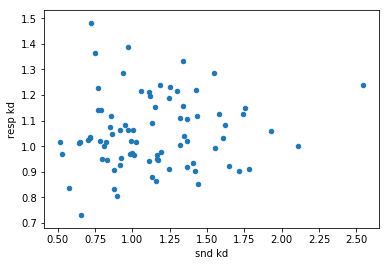

In [67]:
kd_diff.plot.scatter(x='snd kd', y = 'resp kd')